<a href="https://colab.research.google.com/github/44REAM/RA-Medphys/blob/main/Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft

# Basis function

## Quadratic functions

$$y = ax^2 + bx + c$$
$a\neq 0, b,c \ \text{constant} $



In [ ]:
def quadratic(x, a = 1, b = 0, c = 0):
    return a*x**2 + b*x + c

x = 1
y = quadratic(x)
print(y)

1


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
x = np.arange(-2,2, 0.1)
y = quadratic(x)
print(y)

[4.00000000e+00 3.61000000e+00 3.24000000e+00 2.89000000e+00
 2.56000000e+00 2.25000000e+00 1.96000000e+00 1.69000000e+00
 1.44000000e+00 1.21000000e+00 1.00000000e+00 8.10000000e-01
 6.40000000e-01 4.90000000e-01 3.60000000e-01 2.50000000e-01
 1.60000000e-01 9.00000000e-02 4.00000000e-02 1.00000000e-02
 3.15544362e-30 1.00000000e-02 4.00000000e-02 9.00000000e-02
 1.60000000e-01 2.50000000e-01 3.60000000e-01 4.90000000e-01
 6.40000000e-01 8.10000000e-01 1.00000000e+00 1.21000000e+00
 1.44000000e+00 1.69000000e+00 1.96000000e+00 2.25000000e+00
 2.56000000e+00 2.89000000e+00 3.24000000e+00 3.61000000e+00]


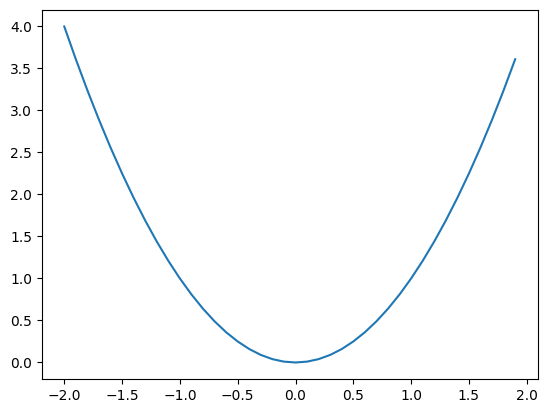

In [ ]:

plt.plot(x,y)


## Trigonometric functions

$$y = sin (x)$$
$$y = cos (x)$$

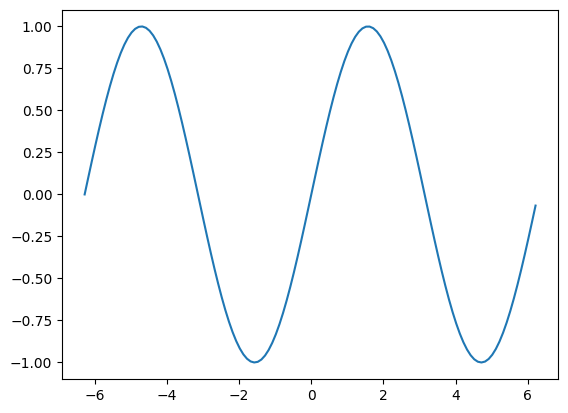

In [ ]:
x = np.arange(-2*np.pi,2*np.pi, 0.1)
y = np.sin(x)

plt.plot(x,y)

## Exponential decay

$$y=\begin{cases}
    e^{-ax}, & x\ge0\\
    0, & x<0.
  \end{cases}$$

In [16]:
def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0


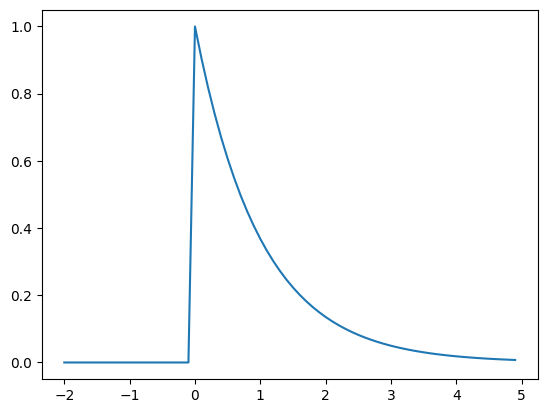

In [17]:
exp_decay_v = np.vectorize(exp_decay, otypes=[float])
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)
plt.plot(x,y)

## Error function erf(x)

$$erf(x) = \frac{2}{\sqrt{π}} ∫^x_0 {e^{-y^2} dy}$$

In [10]:
def my_integral(y):
    return np.exp(-y**2)

def erf(x):
    return integrate.quad(my_integral, 0, x)[0] * 2 / np.sqrt(np.pi)

erf_v = np.vectorize(erf)

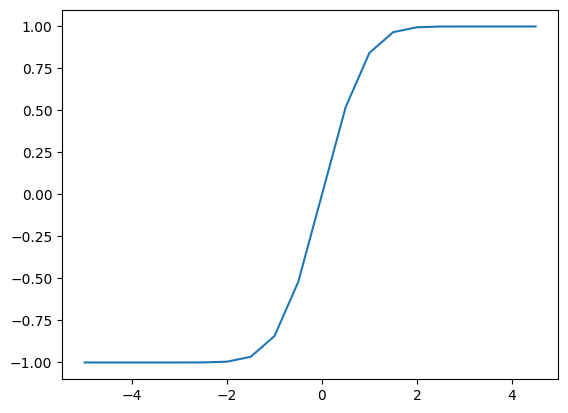

In [12]:
x = np.arange(-5, 5, 0.5)
y = erf_v(x)
plt.plot(x,y)

## Example

### Sketch the graph of $e^{-|x|}$

In [7]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x,a = 1):

    return 0


### Sketch the graph of $q_a=\begin{cases}
    1-\frac{|x|}{a}, & x\le a\\
    0, & x>a.
  \end{cases}$

In [ ]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x, a = 1):

    return 0


# Detector response functions

## Rectangular pulse functions $p_a(x), a>0$

## Parabolic functions $s_R(x)$



## Translation and reflection

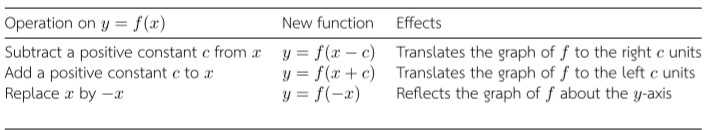

In [29]:
# Suppose we have a pre-defined function below
# write the code for translation and reflection

def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0

def right_translation(x,y, translation = 0):
    return x+translation, y

# Your code here
# write code for reflection
def reflection(x,y):
    return x,y
exp_decay_v = np.vectorize(exp_decay, otypes=[float])


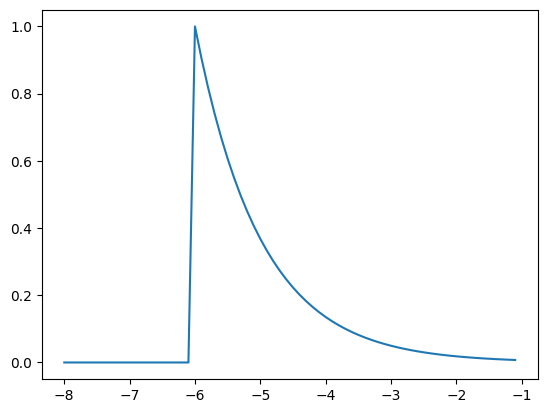

In [30]:

x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = right_translation(x,y, translation = -6)
plt.plot(x,y)

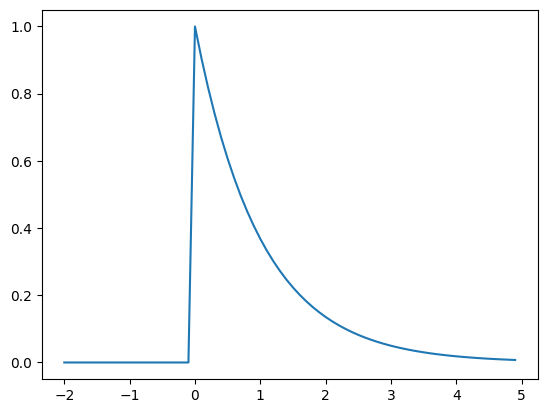

In [32]:
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = reflection(x,y)
plt.plot(x,y)

# Fourier transform property



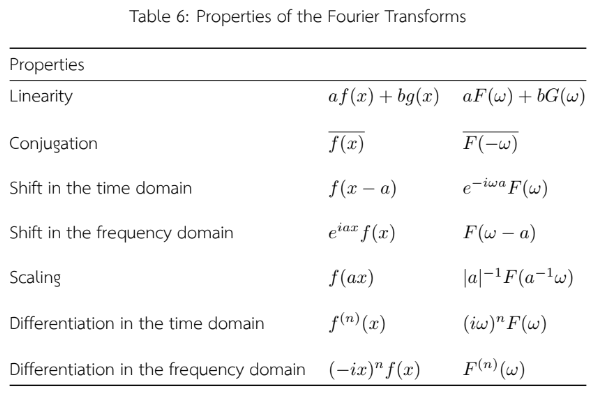

## Convolution theorem

$$F(f\ast g)(ω) = F(ω)G(ω)$$

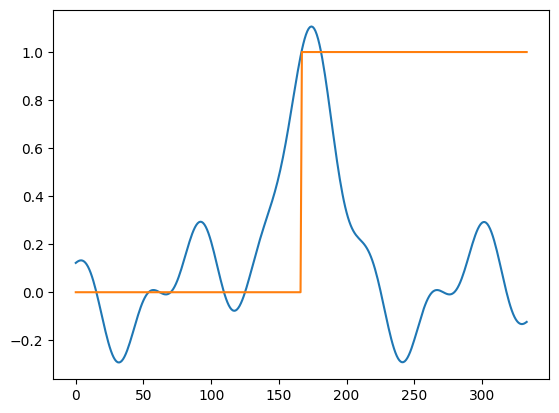

In [ ]:
x = np.arange(-5,5,0.03)
f = signal.gaussian(len(x), std=20) + np.sin(x*2)*0.2 + np.sin(x*5)*0.1
g = np.heaviside(x, 1)

plt.plot(f)
plt.plot(g)

$$f(x)\ast g (x)$$

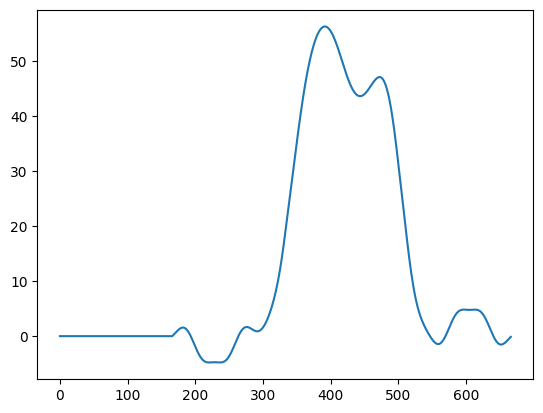

In [ ]:
conv_results = np.convolve(f, g)
plt.plot(conv_results)

In [ ]:
fourier_conv = fftshift(fft(conv_results))
freq_conv = fftshift(fftfreq(len(conv_results)))

f = np.pad(f, (0, len(f)), 'constant', constant_values=0)
g = np.pad(g, (0, len(g)), 'constant', constant_values=0)
fourier_f = fftshift(fft(f))
freq_f = fftshift(fftfreq(len(f)))
fourier_g = fftshift(fft(g))


$$\mathcal{F}(f(x)\ast g (x))$$

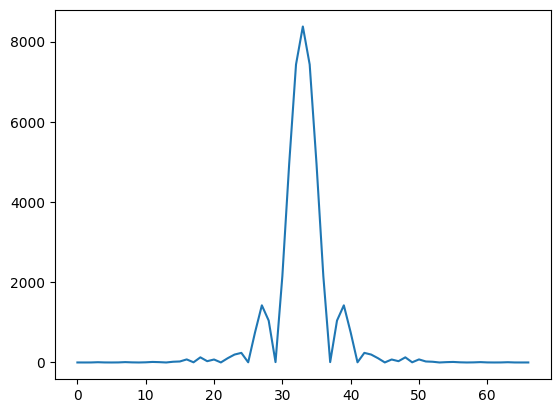

In [ ]:
plt.plot( np.abs(fourier_conv)[(freq_conv>-0.05)& (freq_conv<0.05)] )

$$\mathcal{F}(f(x)) × \mathcal{F}(g(x))$$

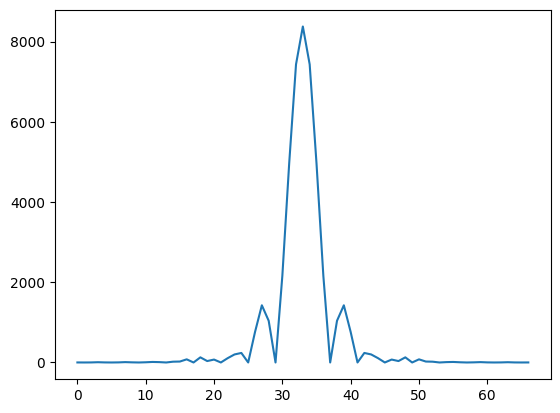

In [ ]:
plt.plot(np.abs(fourier_g * fourier_f)[(freq_f>-0.05)& (freq_f<0.05)] )

$$\mathcal{F}^{-1}(F(ω)G(ω))$$

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


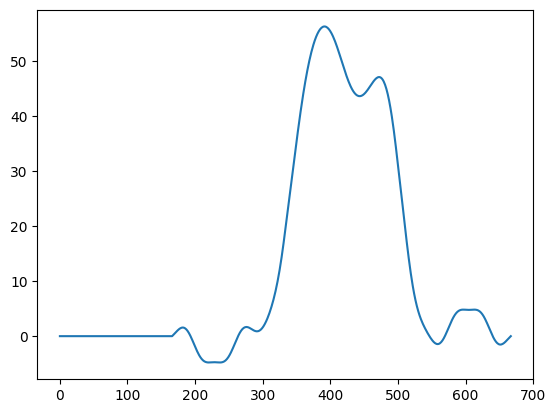

In [ ]:
f_g = ifft(ifftshift(fourier_g) * ifftshift(fourier_f))
plt.plot(f_g)

# Garcia paper

$$d_m(x) = ∫^{∞}_{-∞} d(y) k(x-y)dy$$

Given $d_m$ and $k$, find $d$